# MSE , MAE , RMSE , R2 SCORE & AJUSTED R2 SCORE

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../../DATASET/placement.csv')

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


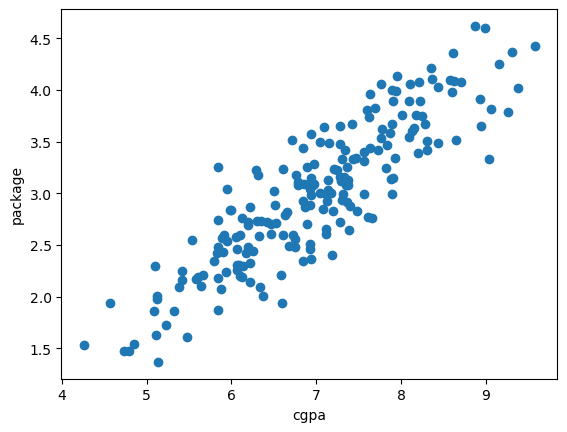

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [8]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state =2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [14]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [15]:
lr.predict(x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

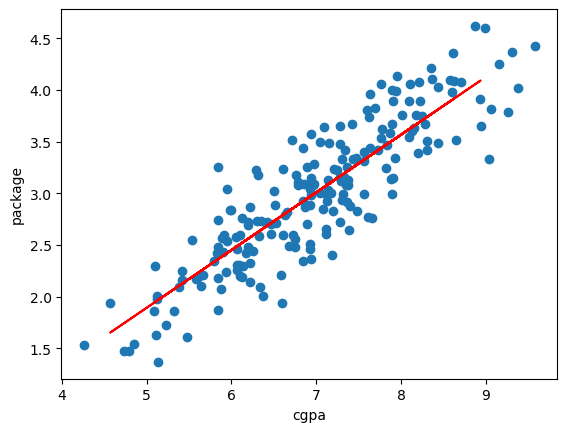

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,lr.predict(x_test),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [17]:
# calculating MAE , MSE , RMSE , R2 SCORE , ADJUSTED R2 SCORE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# to calculate all the errors we just need two values , y_test and y_pred

In [18]:
# y_pred
y_pred=lr.predict(x_test)

In [19]:
# y_test
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [20]:
# Calculating MAE
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [21]:
# Calculate MSE
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [22]:
# calculate RMSE 
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [23]:
# Calculate R2 Score
print("R2 Score",r2_score(y_test,y_pred))

R2 Score 0.780730147510384


In [24]:
# calculating Adjusted R2 Score
# store r2 score
r2=r2_score(y_test,y_pred)

In [25]:
x_test.shape

(40, 1)

In [26]:
# r2 adj = 1 - ((1 - r2) * ( n - 1 ) / ( n - 1 - k ))
# r2 = r2 score ; n = no of rows ; k = no of independent columns
r2_adj = 1 - ((1 -r2) * (x_test.shape[0]-1) / (x_test.shape[0]-1-x_test.shape[1]))
print("R2 Adjusted Score",r2_adj)

R2 Adjusted Score 0.7749598882343415


In [27]:
# Lets add a random column to check effect on the Adjusted R2 Score
new_df1=df.copy()
new_df1['random']=np.random.random(200)
new_df1 = new_df1[['cgpa','random','package']]
new_df1.head()


,cgpa,random,package
0,6.89,0.830703,3.26
1,5.12,0.283212,1.98
2,7.82,0.525043,3.25
3,7.42,0.026815,3.67
4,6.94,0.316525,3.57


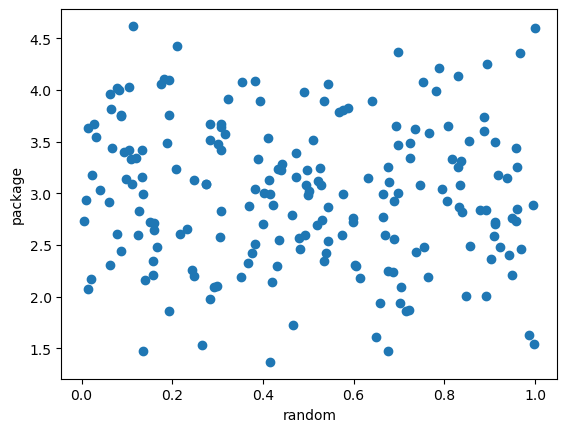

In [28]:
plt.scatter(new_df1['random'],new_df1['package'])
plt.xlabel('random')
plt.ylabel('package')
plt.show()
# This graph shows that there is no linear relationship between random and package

In [29]:
x1=new_df1.iloc[:,0:2]
y1=new_df1.iloc[:,-1]

In [30]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=2)

In [31]:
LR=LinearRegression()

In [32]:
LR.fit(x1_test,y1_test)

LinearRegression()

In [33]:
y1_pred=LR.predict(x1_test)

In [34]:
print("R2 Score",r2_score(y1_test,y1_pred))
r2_2=r2_score(y1_test,y1_pred)

R2 Score 0.8000567727821478


In [35]:
x1_test.shape

(40, 2)

In [36]:
r2_adj2 = 1 - ((1 - r2_2) * (x1_test.shape[0] -1) / (x1_test.shape[0] - 1 - x1_test.shape[1]))
print("R2 Adjusted Score",r2_adj2)

R2 Adjusted Score 0.789249030770372


In [37]:
# Lets take another example with a feature that is related to the target variable and see how it affect the R2 Adjusted Score

new_df2 = df.copy()
new_df2['IQ']=new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','IQ','package']]

In [38]:
new_df2.head()

,cgpa,IQ,package
0,6.89,4.16,3.26
1,5.12,1.08,1.98
2,7.82,2.95,3.25
3,7.42,4.67,3.67
4,6.94,2.47,3.57


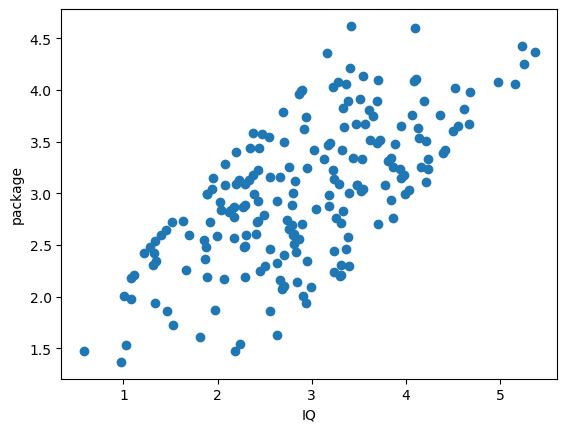

In [39]:
plt.scatter(new_df2['IQ'],new_df2['package'])
plt.xlabel('IQ')
plt.ylabel('package')
plt.show()
# As we can see there is a linear relationship between IQ and package

In [40]:
x2=new_df2.iloc[:,0:2]
y2=new_df2.iloc[:,-1]

In [41]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=2)

In [42]:
Lr=LinearRegression()

In [43]:
Lr.fit(x2_test,y2_test)

LinearRegression()

In [44]:
y2_pred=Lr.predict(x2_test)

In [45]:
print("R2 Score",r2_score(y2_test,y2_pred))
r2_3 = r2_score(y2_test,y2_pred)

R2 Score 0.8385960965473975


In [46]:
x2_test.shape

(40, 2)

In [47]:
r2_adj3 = 1 - ((1- r2_3) * (x2_test.shape[0] -1) / (x2_test.shape[0] -1 - x2_test.shape[1]))
print("R2 Adjusted Score", r2_adj3)

R2 Adjusted Score 0.8298715612256352
